# PRÁCTICA 1 : Iván Pérez Maestre

Importo lo que necesito antes de nada

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings #Para avisos posteriores

## **APARTADO 3. DIFERENCIAS FINITAS**

Para hacer este ejercicio, en los dos primeros apartados se requiere de resolver dos sistemas de ecuaciones lineales. La idea es aprovechar Python para resolverlo de forma más rápida.

Uso para ello el módulo de numpy linalg.solve() para resolver estos sistemas

**Sea $f$ una función suficientemente diferenciable y con todas sus derivadas acotadas. Dado un $h>0$ se pide:**

#### **c) Considerar las diferencias finitas de la forma forward $\Delta_hf(x) = \frac{a_0f(x) + a_1f(x+h) + a_2f(x+2h) + a_3f(x+3h)}{h}$:**

#### **Determinar los valores $a_0$, $a_1$, $a_2$, $a_4 \in \mathbb R$ que hagan que $\Delta_hf(x)$ sea una discretización de $f'(x)$ del mayor orden posible.**

Para la resolución de este ejercicio basta aplicar el razonamiento visto en clase de teoría y aplicar desarrollos en serie de Taylor para los términos $f(x+h)$, $f(x+2h)$ y $f(x+3h)$ cuando $h$ tiende a 0. Para ello, se trunca en el orden 3 (no se puede avanzar más para lo que se busca hacer). De esta forma:

\begin{array}{rcl}
     f(x+h) & = & f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + \frac{1}{6}h^3f'''(x) + O(h^4)
  \\ f(x+2h) & = & f(x) + 2hf'(x) + 2h^2f''(x) + \frac{4}{3}h^3f'''(x) + O(h^4)
  \\ f(x+3h) & = & f(x) + 3hf'(x) + \frac{9}{2}h^2f''(x) + \frac{9}{2}h^3f'''(x) + O(h^4)
\end{array}

Ahora estamos en condiciones de sustituir por la expresión del enunciado con lo que se llega a: 
$\Delta_hf(x) = (a_0+a_1+a_2+a_3)\frac{f(x)}{h} + (a_1+2a_2+3a_3)f'(x) + (\frac{1}{2}a_1+2a_2+\frac{9}{2}a_3)hf''(x) + (\frac{1}{6}a_1+\frac{4}{3}a_2+\frac{9}{2}a_3)h^2f'''(x)$

Ahora, téngase en cuenta que se busca aproximar $f'(x)$, luego está claro que se han de cumplir las siguientes condiciones:
\begin{array}{rcl}
     a_0 + a_1 + a_2 + a_3 & = & 0
  \\ a_1 + 2a_2 + 3a_3 & = & 1
  \\ \frac{1}{2}a_1+2a_2+\frac{9}{2}a_3 & = & 0
  \\ \frac{1}{6}a_1+\frac{4}{3}a_2+\frac{9}{2}a_3 & = & 0
\end{array}

Queda por tanto, resolver ese sistema para hallar los coeficientes $a_j$ que cumplen lo que buscamos, que la discretización de $f'(x)$ sea del mayor orden posible. Para ello usamos np.linalg.solve()

---

In [9]:
A1 = np.array([[1,1,1,1],[0,1,2,3],[0,1/2,2,9/2],[0,1/6,4/3,27/6]])
B1 = np.array([0,1,0,0])

solucion1 = np.linalg.solve(A1,B1)
solucion1

array([-1.83333333,  3.        , -1.5       ,  0.33333333])

Aunque numpy muestra los números con decimales, podemos pasarlo a fracciones y se obtiene que los coeficientes en cuestión son:

$a_0 = -\frac{11}{6}$, $a_1 = 3$, $a_2 = -\frac{3}{2}$ y  $a_3 = \frac{1}{3}$

---

#### **d) Considerar las diferencias finitas centradas de la forma $\delta_hf(x) = \frac{b_{-2}f(x-2h) + b_{-1}f(x-h) + b_1f(x+h) + b_2f(x+2h)}{h}$:**

#### **Determinar los valores $b_{-2}$, $b_{-1}$, $b_1$, $b_2 \in \mathbb R$ que hagan que $\delta_hf(x)$ sea una discretización de $f'(x)$ del mayor orden posible.**

De nuevo el razonamiento es el mismo que en el apartado anterior aunque ahora tengamos diferencias finitas centradas, el resto es totalmente análogo. Desarrollando por Taylor los distintos elementos se tiene:

\begin{array}{rcl}
     f(x-2h) & = & f(x) - 2hf'(x) + 2h^2f''(x) - \frac{4}{3}h^3f'''(x) + O(h^4)
  \\ f(x-h) & = & f(x) - hf'(x) + \frac{1}{2}h^2f''(x) - \frac{1}{6}h^3f'''(x) + O(h^4)
  \\ f(x+h) & = & f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + \frac{1}{6}h^3f'''(x) + O(h^4)
  \\  f(x+2h) & = & f(x) + 2hf'(x) + 2h^2f''(x) + \frac{4}{3}h^3f'''(x) + O(h^4)
\end{array}

Sin más que sustituir en la expresión de enunciado, se tiene que:
$\delta_hf(x) = (b_{-2} + b_{-1} + b_1 + b_2)\frac{f(x)}{h} + (-2b_{-2} - b_{-1} + b_1 + 2b_2)f'(x) + (2b_{-2} + \frac{1}{2}b_{-1} + \frac{1}{2}b_1 + 2b_2)hf''(x) + (-\frac{4}{3}b_{-2} - \frac{1}{6}b_{-1} + \frac{1}{6}b_1 + \frac{4}{3}b_2)h^2f'''(x)$

De nuevo, todo se reduce a resolver el siguiente sistema:
\begin{array}{rcl}
     b_{-2} + b_{-1} + b_1 + b_2 & = & 0
  \\ -2b_{-2} - b_{-1} + b_1 + 2b_2 & = & 1
  \\ 2b_{-2} + \frac{1}{2}b_{-1} + \frac{1}{2}b_1 + 2b_2 & = & 0
  \\ -\frac{4}{3}b_{-2} - \frac{1}{6}b_{-1} + \frac{1}{6}b_1 + \frac{4}{3}b_2 & = & 0
\end{array}

In [10]:
A2 = np.array([[1,1,1,1],[-2,-1,1,2],[2,1/2,1/2,2],[-4/3,-1/6,1/6,4/3]])
B2 = np.array([0,1,0,0])

solucion2 = np.linalg.solve(A2,B2)
solucion2

array([ 0.08333333, -0.66666667,  0.66666667, -0.08333333])

De nuevo, en forma de fracción para mayor comodidad:

$b_{-2} = \frac{1}{12}$, $b_{-1} = -\frac{2}{3}$, $b_1 = \frac{2}{3}$, $b_2 = -\frac{1}{12}$

---

Un comentario que se quiere hacer sobre estos dos apartados es que se ha buscado desde el primer momento discretizar con el mayor orden posible y esto ha sido lo máximo que se ha conseguido y es que si se aumentaba el orden, los sistemas que quedaban a resolver no tenían solución y por tanto no se podía hacer una discretización de mayor orden

---

#### **e) Considerad $f(x) = cos(x)$. Construid un programa y calculad numéricamente $f'(x)$ en el intervalo $x \in [0,2\pi]$ utilizando las discretizaciones $\Delta_h$, $\delta_h$ que acabais de obtener. Calculad el error de vuestra derivada en ambos casos para diferentes valores de $h$ y discutid si el error se ajusta a las predicciones teóricas. Recomendación: pintar el error en escala logarítmica.**

##### Primer caso: $\Delta_h$:
Démonos cuenta que, a priori, parecería un problema el hecho de usar el método forward para calcular numéricamente la derivada en los últimos puntos del dominio (nosotros vamos a tener un array en el cual queremos calcular derivadas) ya que para llegará un momento (últimos 3 puntos) en el que nos saldremos del array.
Para solucionar este problema, se usa que la función $cos(x)$ es una función 2$\pi$-periódica con lo que se puede tomar el inicio del array como "continuación" del propio array del dominio ya que estamos en $[0,2\pi]$

In [12]:
def DerivadaForward(solucion1,numPuntos): #solucion1 van a ser los hallados antes en el apartado c, se hace así para aportar generalidad
    #numPuntos va a ser el número de puntos que consideramos en el dominio, lo ponemos como input de cara a variarlo más adelante
    t=np.linspace(0,2*np.pi,numPuntos) #Dominio que se tiene en cuenta
    
    t_modificado=np.concatenate((t,np.array([t[0],t[1],t[2]]))) #Como se ha explicado, de esta forma vamos a poder calcular la derivada forward...
    #... de los 3 últimos elementos del array sin salirnos del mismo en el bucle que viene a continuación. Otra forma sería recorrer t con el...
    #... for y poner condiciones al llegar a los 3 últimos elementos, pero así el código queda más sencillo.
    f=np.cos(t_modificado) #Queremos la imagen de t_modificado para usar esa lógica
    global h #Se hace esto para que la variable h se pueda usar fuera de la función, que nos será útil para después
    h=t[1]-t[0] #Como es un linspace, el paso es siempre el mismo y uso para ellos los dos primeros elementos del dominio (su diferencia)
    derivada_forward=[]
    for i in range (0,len(t_modificado)-3):
        derivada_forward.append((solucion1[0]*f[i]+solucion1[1]*f[i+1]+solucion1[2]*f[i+2]+solucion1[3]*f[i+3])/h) 
    return(t, derivada_forward)

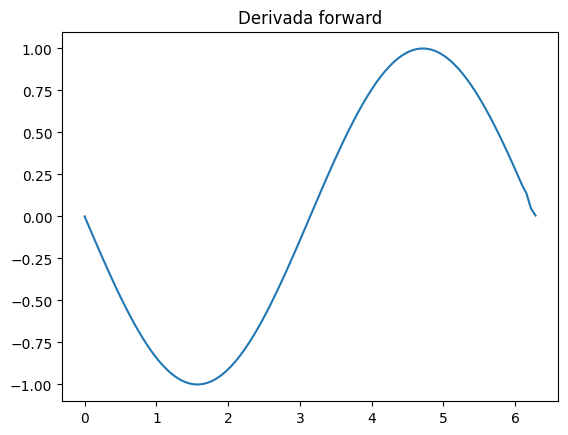

In [13]:
t, derivada_forward = DerivadaForward(solucion1,100)
plt.plot(t,derivada_forward)
plt.title('Derivada forward')
plt.show()

---

##### Segundo caso $\delta_h$:

De nuevo puede parecer que tenemos el mismo problema con el tema de "salirse" del dominio, pero se soluciona de la misma manera aunque ahora también hay que añadir los elementos finales al principio del array para obtener los términos $f(x-2h)$ y $f(x-h)$.

In [14]:
def DerivadaCentrada(solucion2,numPuntos): #solucion2 van a ser los hallados antes en el apartado d, se hace así para aportar generalidad
    t=np.linspace(0,2*np.pi,numPuntos) #Dominio que se tiene en cuenta
    
    t_modificado=np.concatenate((np.array([t[-2],t[-1]]),t,np.array([t[0],t[1]]))) #No se le da más vueltas, misma lógica
    f=np.cos(t_modificado)
    global h
    h=t[1]-t[0] #Otra vez, mismo salto siempre 
    derivada_centrada=[]
    for i in range (2,len(t_modificado)-2):
        derivada_centrada.append((solucion2[0]*f[i-2]+solucion2[1]*f[i-1]+solucion2[2]*f[i+1]+solucion2[3]*f[i+2])/h)
    return(t,derivada_centrada)

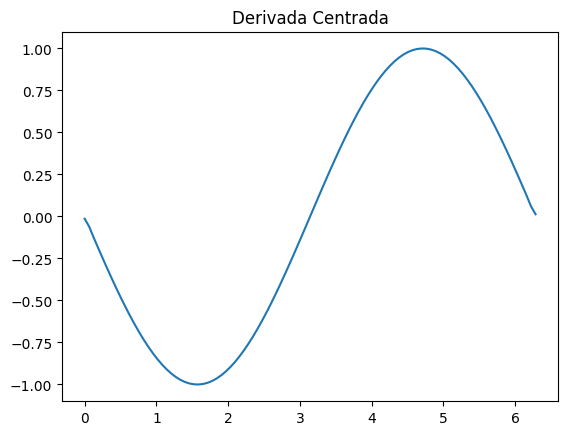

In [15]:
t, derivada_centrada = DerivadaCentrada(solucion2,100)
plt.plot(t,derivada_centrada)
plt.title('Derivada Centrada')
plt.show()

##### Error entre las discretizaciones y la derivada:

Basta llamar a las funciones con las que hemos calculado las derivadas forward y centradas con distinto cardinal del dominio o, lo que es lo mismo, a más puntos en el dominio como se crea un linspace, un menor paso $h$.

La idea es que para cada valor de $h$ se puede calcular un error asociado a cada punto del linspace, lo cual nos da un vector de errores para cada valor de $h$. Como el objetivo es representar el error para cada valor de $h$, parece lógico que, para cada vector de errores, calcular la media y así, para cada $h$ tendremos un único error.

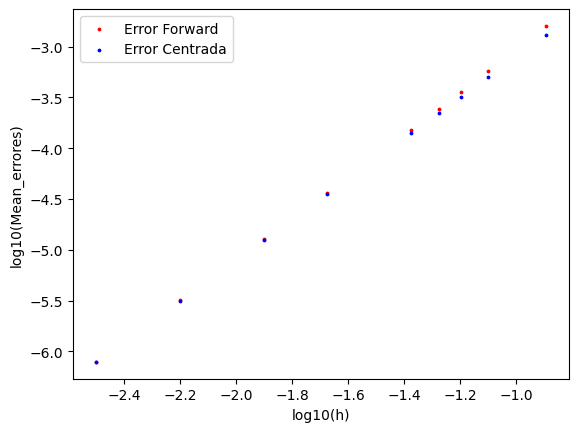

In [36]:
cardinal_lista = [50,80,100,120,150,300,500,1000,2000] #Por ejemplo, se podrían tomar todos los que se quisieran

h_lista = [] #Lista vacía con las h sucesivas

#Listas con las medias de errores vacías
error_forward_mean = []
error_centrada_mean = []

for i in range(0,len(cardinal_lista)):
    #Listas vacías para rellenar con el vector de errores para cada linspace. Se vacía en cada bucle para que no haya errores
    error_forward_lista = []
    error_centrada_lista = []
    
    #Ahora llamamos a las funciones para obtener las derivadas forward y centrada para cada valor del cardinal del dominio
    t, derivada_forward = DerivadaForward(solucion1,cardinal_lista[i])
    t, derivada_centrada = DerivadaCentrada(solucion2,cardinal_lista[i])
    
    h_lista.append(h) #Como la variable h es global, se le puede llamar sin problema
    f_der = -np.sin(t)
    
    error_forward_lista.append(np.absolute(f_der - derivada_forward))
    error_centrada_lista.append(np.absolute(f_der - derivada_centrada))
    
    error_forward_mean.append(np.mean(error_forward_lista))
    error_centrada_mean.append(np.mean(error_centrada_lista))

h_lista_log10 = np.log10(h_lista)
error_FM_log10 = np.log10(error_forward_mean)
error_CM_log10 = np.log10(error_centrada_mean)

plt.scatter(h_lista_log10,error_FM_log10, color = 'red', label = 'Error Forward', s = 3.0)
plt.scatter(h_lista_log10,error_CM_log10, color = 'blue', label = 'Error Centrada', s = 3.0)
plt.xlabel('log10(h)')
plt.ylabel('log10(Mean_errores)')
plt.legend()
plt.show()

## **APARTADO 4. SERIES DE FOURIER**

#### "SCRIPT" UTILIZADO PARA TODO EL EJERCICIO

La idea para la resolución de todo el ejercicio es mostrar ahora el script con todas las funciones utilizadas para sacar la serie, derivada, estimar el valor en un punto concreto, etc.

Con ello, en los sucesivos apartados bastará llamar a las funciones en cuestión

In [8]:
np.set_printoptions(suppress=True) #Para que no aparezca notación científica de cara a redondear
warnings.filterwarnings('ignore') #Para ignorar avisos innecesarios

#Defino una función para obtener coeficientes de Fourier dado un cierto array "delta" de imágenes:
def CoefsFourier(alpha,delta):
    c_n = np.fft.rfft(delta, norm='forward') #Coeficientes en forma compleja
    #a_n y b_n serán los arrays de la representación trigonométrica de la serie de Fourier
    a_n = np.zeros(len(c_n))
    b_n = np.zeros(len(c_n)-1) #De dimensión una menos pues no tenemos b_0
    for i in range(0, len(c_n)):
        a_n[i] = c_n[i] + np.conjugate(c_n[i])
        if i>0:
            b_n[i-1] = (np.conjugate(c_n[i]) - c_n[i])/(0 + 1j)
    #Redondeo los coeficientes hasta la segunda cifra decimal. Ya trabajo todo el tiempo con los de la reprsentación trigonométrica:
    a_n = a_n.round(2)
    b_n = b_n.round(2)
    return(a_n,b_n)

#Defino una función para obtener la serie de Fourier asociada:
def SerieFourier(a_n,b_n,alpha,T):
    dominio = np.linspace(alpha[0], alpha[-1], 1000) #Dominio de cara a la representación. Lo hago para que cubra los valores experimentales.
    serie_trig = np.zeros(len(dominio))
    serie_trig = serie_trig + a_n[0]/2 #Primer valor
    for i in range(0,len(b_n)):
        serie_trig = serie_trig + a_n[i+1]*np.cos((i+1)*2*np.pi/T*dominio) + b_n[i]*np.sin((i+1)*2*np.pi/T*dominio)
    return(dominio,serie_trig)

#Defino otra función para la derivada (tasa de cambio) siguiendo el mismo argumento que en la anterior teniendo en cuenta cómo queda
def SerieFourierDer(a_n,b_n,alpha,T):
    dominio = np.linspace(alpha[0], alpha[-1], 1000) #Dominio de cara a la representación. Lo hago para que cubra los valores experimentales.
    serie_trig = np.zeros(len(dominio))
    for i in range(0,len(b_n)):
        serie_trig = serie_trig - (i+1)*2*np.pi/T*a_n[i+1]*np.sin((i+1)*2*np.pi/T*dominio) + (i+1)*2*np.pi/T*b_n[i]*np.cos((i+1)*2*np.pi/T*dominio)
    return(dominio,serie_trig)

#Defino una función para sacar la delta estimada para un cierto valor de alpha (misma lógica que lo anterior para la propia serie)
def EstimDecl(a,T):
    delta_estimada = a_n[0]/2
    for i in range(0,len(b_n)):
        delta_estimada = delta_estimada + a_n[i+1]*np.cos((i+1)*2*np.pi/T*a) + b_n[i]*np.sin((i+1)*2*np.pi/T*a)
    return(delta_estimada)

#Por último simplemente se usa una última función para hallar la derivada en un punto en concreto siguiendo la lógica de las dos funciones anteriores
def EstimDerDecl(a,T):
    derivada_estimada = 0
    for i in range(0,len(b_n)):
        derivada_estimada = derivada_estimada - (i+1)*2*np.pi/T*a_n[i+1]*np.sin((i+1)*2*np.pi/T*
                                                                                a) + (i+1)*2*np.pi/T*b_n[i]*np.cos((i+1)*2*np.pi/T*a)
    return(derivada_estimada)

**Dados los datos de la tabla que se muestran en el enunciado, responder a las siguientes cuestiones:**

#### **f) Asume la existencia de una función periódica $\delta = f(\alpha)$. Aproxima $f(\alpha)$ mediante los datos en la tabla y el algoritmo rFFT. ¿Cuántos coeficientes de la serie de Fourier correspondientes podremos obtener? ¿A cuántas frecuencias corresponden?**

In [9]:
#Meto los datos que tenemos de cara a resolver el ejercicio concreto que tenemos
alpha = np.arange(0,360,30)
delta = np.array([408, 89, -66, 10, 338, 807, 1238, 1511, 1583, 1462, 1183, 804])

T = 360 #Doy ya también el período en este caso que será 360 a lo largo de todo el ejercicio

Sin más que llamar a la función CoefsFourier de arriba se pueden obtener los coeficientes $a_n$ y $b_n$ de la serie de Fourier en su reprsentación trigonométrica:

In [10]:
warnings.filterwarnings('ignore')
a_n,b_n = CoefsFourier(alpha,delta)
print('Los coeficientes a_n son: \n')
print(a_n)
print('\n Por otro lado, los coeficientes b_n son: \n')
print(b_n)

Los coeficientes a_n son: 

[1561.17 -411.01   43.42   -4.33   -1.08    0.35    0.17]

 Por otro lado, los coeficientes b_n son: 

[-720.23   -2.17    5.5    -1.01   -0.27    0.  ]


---

Se puede observar que los coeficientes ya están redondeados al segundo decimal y que, como es evidente, hay un "$a_n$" más, que es el coeficiente $a_0$.

Sabemos que el algoritmo rFFT devuelve los coeficientes de la representación compleja $c_n$ empezando en $c_0$ y llegando a tener $N/2 + 1$ coeficientes.
Como tenemos 12 puntos en nustros datos, el algoritmo rFFT nos devuelve 7 coeficientes asociados a los primeros 7 armónicos. 

#### **g) Redondea los coeficientes hasta la segunda cifra decimal y proporciona la aproximación de $\delta$ en serie de Fourier trigonométrica:**

Para esta parte basta entender con claridad lo que significan los $a_n$ y los $b_n$, con esto en mente es fácil deducir que la aproximación en serie de Fourier de estos datos es, dado que el período es T = 2$\pi$ radianes o 360º:

$f(\alpha) = a_0/2 + a_1cos(\alpha) + b_1sen(\alpha) + ... + a_6cos(6\alpha) + b_6sen(6\alpha)$. Más concretamente, si usamos los coeficientes encontrados más arriba:

$ \delta = f(\alpha) = 780'59 - 411'01cos(\alpha) - 720'23sen(\alpha) + 43'42cos(2\alpha) - 2'17sen(2\alpha) - 4'33cos(3\alpha) + 5'50sen(3\alpha) - 1'08cos(4\alpha) - 1'01sen(4\alpha) + 0'35cos(5\alpha) - 0'27sen(5\alpha) + 0'17cos(6\alpha)$

#### **h)Representa la función $f(\alpha)$ obtenida:**

Basta llamar ahora a la función SerieFourier que toma como input los coeficientes $a_n$ y $b_n$ de la representación trigonométrica así como el array de $\alpha$ que se tenga como dato y el período T.

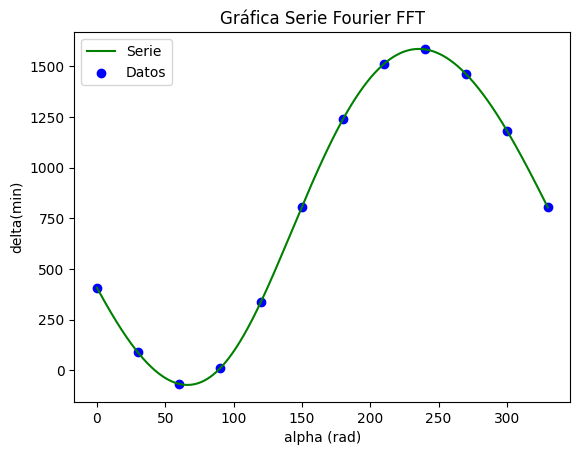

In [11]:
dominio, serie_trig = SerieFourier(a_n,b_n,alpha,T) #dominio es simplemente donde evaluar la suma de Taylor y...
#... serie_trig es la imagen de la suma que se ha mostrado arriba en ese dominio

plt.plot(dominio,serie_trig, color = 'green', label = 'Serie')
plt.scatter(alpha,delta, color = 'blue', label = 'Datos')
plt.legend()
plt.xlabel('alpha (rad)')
plt.ylabel('delta(min)')
plt.title('Gráfica Serie Fourier FFT')
plt.show()

Como comentario, se puede ver que la suma finita de Fourier aproxima muy bien los puntos experimentales que teníamos desde el principio

---

#### **i) Calcula la declinación que se espera a 45º de AR:**

De nuevo basta llamar a la función "EstimDecl" con 45º como argumento para hallar lo que queremos en este caso:

In [12]:
a = 45 #Ejemplo concreto que se pide en el enunciado
delta_estimada = EstimDecl(a,T)
print('La estimación de declinación para ese valor de alpha es de: \n')
print(delta_estimada)

La estimación de declinación para ese valor de alpha es de: 

-13.518184032901207


Se puede observar por tanto que la declinación $\delta$ estimada para $\alpha = 45º$ es $\delta = -13'52$ minutos

---

#### **j) Finalmente, utiliza la serie de Fourier calculada para estimar la tasa de cambio de $\delta$ en función de $\alpha$ y representa la función resultante. Así mismo estima el valor de $f'(45)$. Se valorará positivamente la resolución de este ejercicio mediante el uso de un algoritmo lo más general posible.**

Para ello puedo utilizar la propia función "SerieFourierDer" teniendo en cuenta que la derivada de la suma finita de Fourier, sin más que derivar es:

$f'(t) = + 411'01sen(\alpha) - 720'23cos(\alpha) - 2\cdot43'42sen(2\alpha) - 2\cdot2'17cos(2\alpha) + 3\cdot4'33sen(3\alpha) + 3\cdot5'50cos(3\alpha) + 4\cdot1'08sen(4\alpha) - 4\cdot1'01cos(4\alpha) - 5\cdot0'35sen(5\alpha) - 5\cdot0'27cos(5\alpha) - 6\cdot0'17sen(6\alpha)$

Es decir, los coeficientes que van con los cosenos son los $n\cdot b_n$ y los que van con el seno son los $-n\cdot a_n$, que es lo que ya he tenido en cuenta en la función SerieFourierDer

Por ello, basta llamar a dicha función:

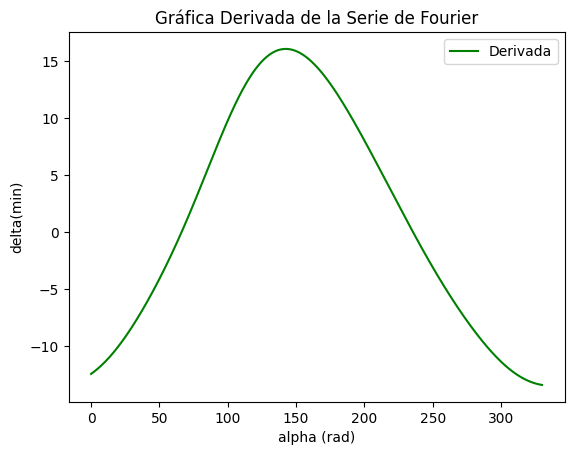

In [13]:
dominio, serie_trigDer = SerieFourierDer(a_n,b_n,alpha,T) 

import matplotlib.pyplot as plt #Para plotear
plt.plot(dominio,serie_trigDer, color = 'green', label = 'Derivada')
plt.legend()
plt.xlabel('alpha (rad)')
plt.ylabel('delta(min)')
plt.title('Gráfica Derivada de la Serie de Fourier')
plt.show()

---

Para estimar $f'(45)$ basta usar la función EstimDerDecl que definí al principio y de nuevo es usar la misma lógica:

In [14]:
a = 45
derivada_estimada = EstimDerDecl(a,T)
print(derivada_estimada)

-5.248579829342005


Se obtiene por tanto que, con este método, $f'(45) = -5'25$